# LSTM + TextBlob + NLTK


In [3]:
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import scipy.stats as stats
# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from statsmodels.tsa.arima.model import ARIMA


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from google.colab import drive

## A. ARIMA + NTLK + TextBlob

A.1. Prediction du prix de cloture du Bitcoin en utilisant le modéle ARIMA + NTLK + TextBlob - TimeStep : 1 Heure

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Test MSE: 32319.526
Test RMSE: 179.776
R-squared value: 0.99230560281499
577    42556.523438
578    42636.996094
579    42808.246094
580    42808.929688
581    42777.296875
           ...     
716    48298.402344
717    48055.097656
718    48114.257812
719    48133.691406
720    48175.621094
Name: Close, Length: 144, dtype: float64
Int64Index([577, 578, 579, 580, 581, 582, 583, 584, 585, 586,
            ...
            711, 712, 713, 714, 715, 716, 717, 718, 719, 720],
           dtype='int64', length=144)


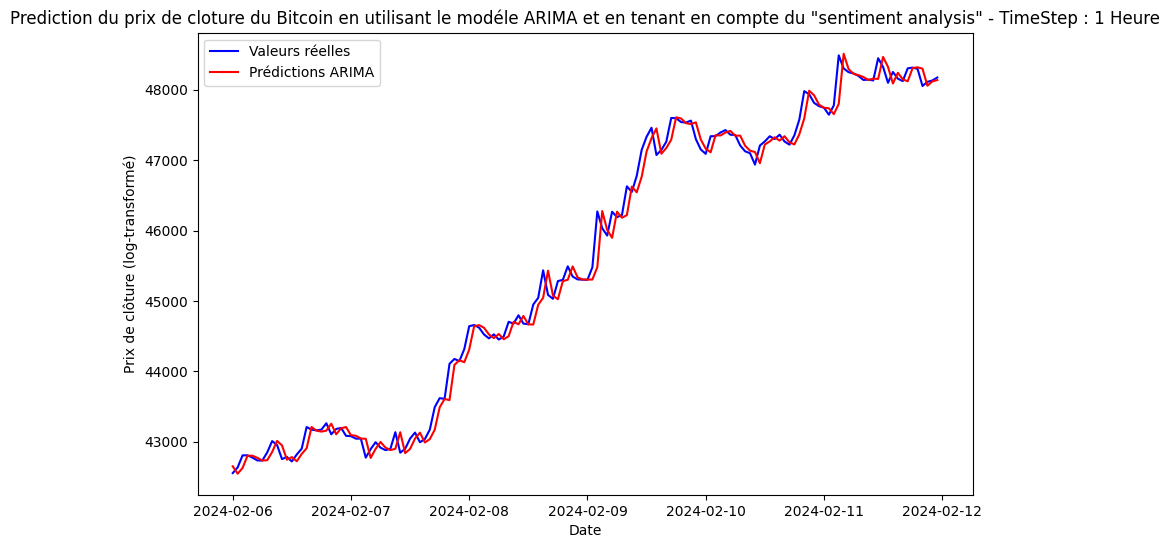

,Datetime,Open,High,Low,Close,Adj Close,Volume,Sentiment_NLTK,Sentiment_TB,neg,neu,pos,compound,Subjectivity,Polarity
1,2024-01-13 00:00:00,42799.445312,42958.730469,42773.238281,42798.507812,42798.507812,160980992.0,1.0,0.0,0.000,0.9660,0.0340,0.14800,0.000000,0.0000
2,2024-01-13 01:00:00,42804.035156,42866.351562,42532.074219,42666.972656,42666.972656,438493184.0,0.0,1.0,0.000,0.9585,0.0415,0.21075,0.283333,0.0125
3,2024-01-13 02:00:00,42660.644531,42839.242188,42549.281250,42568.667969,42568.667969,401788928.0,1.0,0.0,0.000,0.8430,0.1570,0.65970,0.750000,0.0000
4,2024-01-13 03:00:00,42535.035156,42656.000000,42464.144531,42603.203125,42603.203125,166424576.0,1.0,0.0,0.000,0.8430,0.1570,0.65970,0.750000,0.0000
5,2024-01-13 04:00:00,42604.015625,42835.730469,42568.707031,42827.882812,42827.882812,11505664.0,1.0,0.0,0.000,0.8430,0.1570,0.65970,0.750000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,2024-02-11 19:00:00,48293.578125,48375.195312,48273.402344,48298.402344,48298.402344,0.0,-1.0,-1.0,0.309,0.6910,0.0000,-0.81260,0.750000,-0.2500
717,2024-02-11 20:00:00,48299.527344,48368.015625,48022.144531,48055.097656,48055.097656,0.0,-1.0,-1.0,0.309,0.6910,0.0000,-0.81260,0.750000,-0.2500
718,2024-02-11 21:00:00,48059.675781,48143.171875,48004.953125,48114.257812,48114.257812,0.0,-1.0,-1.0,0.309,0.6910,0.0000,-0.81260,0.750000,-0.2500
719,2024-02-11 22:00:00,48125.101562,48232.265625,48121.492188,48133.691406,48133.691406,2199552.0,-1.0,-1.0,0.309,0.6910,0.0000,-0.81260,0.750000,-0.2500


In [8]:
import numpy as np
from google.colab import files
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from google.colab import drive
import pandas as pd

import pandas as pd
'''
# Mount Google Drive if you're using Colab
# drive.mount('/content/drive')

# Load the BTC data
df = pd.read_csv('/content/drive/My Drive/Copie de btc_data.csv')

# Load the news data
df1 = pd.read_csv('/content/drive/My Drive/Copie de news_datasets_text 1h.csv')
'''

df=pd.read_csv('/content/btc_data.csv')
df1=pd.read_csv('/content/news_datasets_text 1h.csv')

# Convert Datetime columns to datetime format and ensure compatibility
df['Datetime'] = pd.to_datetime(df['Datetime'])
df1['date'] = pd.to_datetime(df1['date'])
df1.rename(columns={'date': 'Datetime'}, inplace=True)
# Merge the datasets on the 'Datetime' column
merged_df = pd.merge(df, df1, on='Datetime', how='outer')

# Forward fill missing values in df1
merged_df[['Sentiment_NLTK', 'Sentiment_TB', 'neg', 'neu', 'pos', 'compound', 'Subjectivity', 'Polarity']] = \
    merged_df[['Sentiment_NLTK', 'Sentiment_TB', 'neg', 'neu', 'pos', 'compound', 'Subjectivity', 'Polarity']].ffill()

# Replace categorical values in Sentiment columns
merged_df['Sentiment_TB'] = merged_df['Sentiment_TB'].replace({'Positive': 1, 'Negative': -1, 'Neutral': 0})
merged_df['Sentiment_NLTK'] = merged_df['Sentiment_NLTK'].replace({'Positive': 1, 'Negative': -1, 'Neutral': 0})
merged_df['Datetime']= pd.to_datetime(merged_df['Datetime'])
# Drop the 'Symbol' column if it's not needed
if 'Symbol' in merged_df.columns:
    merged_df.drop(columns=['Symbol'], inplace=True)

# Display the final DataFrame with missing values filled and merged

merged_df = merged_df.iloc[1:-1]
#COLUMNS WITH BOTH NLTK AND TEXTBLOB
''' you can choose to run ARIMA with TextBlob or NLTK features , or even both :
NLTK : compound , pos , neu , neg
TextBlob : Subjectivity , Polarity
'''
'''merged_df=merged_df[[ 'Open','High','Low','Polarity','Subjectivity','compound','pos','neu','neg','Close']]'''

# Définition des paramètres du modèle ARIMA
p = 2  # Ordre du composant AR (Autorégressif)
d = 1  # Ordre de différenciation (Intégré)
q = 2  # Ordre du composant MA (Moyenne Mobile)

# Division des données en ensembles d'entraînement et de test
train_size = int(len(merged_df) * 0.8)
train, test = merged_df['Close'][0:train_size], merged_df['Close'][train_size:len(merged_df)]

history = [x for x in train]  # Historique des observations pour l'entraînement itératif
predictions = []  # Pour stocker les prédictions

# Prédictions en marchant à travers le temps dans l'ensemble de test
for t in range(len(test)):
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test.iloc[t])  # Ajouter l'observation réelle pour la prochaine itération
# Évaluation de la performance du modèle
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
r_squared = r2_score(test, predictions)

# Affichage des métriques de performance
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print("R-squared value:", r_squared)
print(test)
print(test.index)
# Visualisation des valeurs réelles vs prédictions
plt.figure(figsize=(10,6))
plt.plot(merged_df['Datetime'].iloc[len(merged_df)-len(predictions):], test, label='Valeurs réelles', color='blue')
plt.plot(merged_df['Datetime'].iloc[len(merged_df)-len(predictions):], predictions, label='Prédictions ARIMA', color='red')
plt.legend()
plt.title('Prediction du prix de cloture du Bitcoin en utilisant le modéle ARIMA et en tenant en compte du "sentiment analysis" - TimeStep : 1 Heure')
plt.xlabel('Date')
plt.ylabel('Prix de clôture (log-transformé)')
plt.show()
merged_df


A.2. Vecteur correlation entre les variables de sentiments et le prix de cloture - TimeStep : 1 Heure

In [ ]:
columns_of_interest = ['Open','High','Low','Sentiment_NLTK','Sentiment_TB','Polarity','Subjectivity','compound','pos','neu','neg']
correlation_with_target = merged_df[columns_of_interest + ['Close']].corr()['Close']
print(correlation_with_target)
merged_df

Open              0.996033
High              0.998377
Low               0.998069
Sentiment_NLTK   -0.255878
Sentiment_TB     -0.312431
Polarity         -0.321418
Subjectivity      0.191384
compound         -0.325960
pos              -0.224363
neu              -0.222551
neg               0.435791
Close             1.000000
Name: Close, dtype: float64


,Datetime,Open,High,Low,Close,Adj Close,Volume,Sentiment_NLTK,Sentiment_TB,neg,neu,pos,compound,Subjectivity,Polarity
1,2024-01-13 00:00:00,42799.445312,42958.730469,42773.238281,42798.507812,42798.507812,160980992.0,1.0,0.0,0.000,0.9660,0.0340,0.14800,0.000000,0.0000
2,2024-01-13 01:00:00,42804.035156,42866.351562,42532.074219,42666.972656,42666.972656,438493184.0,0.0,1.0,0.000,0.9585,0.0415,0.21075,0.283333,0.0125
3,2024-01-13 02:00:00,42660.644531,42839.242188,42549.281250,42568.667969,42568.667969,401788928.0,1.0,0.0,0.000,0.8430,0.1570,0.65970,0.750000,0.0000
4,2024-01-13 03:00:00,42535.035156,42656.000000,42464.144531,42603.203125,42603.203125,166424576.0,1.0,0.0,0.000,0.8430,0.1570,0.65970,0.750000,0.0000
5,2024-01-13 04:00:00,42604.015625,42835.730469,42568.707031,42827.882812,42827.882812,11505664.0,1.0,0.0,0.000,0.8430,0.1570,0.65970,0.750000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,2024-02-11 19:00:00,48293.578125,48375.195312,48273.402344,48298.402344,48298.402344,0.0,-1.0,-1.0,0.309,0.6910,0.0000,-0.81260,0.750000,-0.2500
717,2024-02-11 20:00:00,48299.527344,48368.015625,48022.144531,48055.097656,48055.097656,0.0,-1.0,-1.0,0.309,0.6910,0.0000,-0.81260,0.750000,-0.2500
718,2024-02-11 21:00:00,48059.675781,48143.171875,48004.953125,48114.257812,48114.257812,0.0,-1.0,-1.0,0.309,0.6910,0.0000,-0.81260,0.750000,-0.2500
719,2024-02-11 22:00:00,48125.101562,48232.265625,48121.492188,48133.691406,48133.691406,2199552.0,-1.0,-1.0,0.309,0.6910,0.0000,-0.81260,0.750000,-0.2500


## B. LSTM + NLTK + TextBlob :

In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.preprocessing import MinMaxScaler


df=merged_df.copy()



df.set_index('Datetime', drop=True, inplace=True)
df.sort_index(inplace=True)
df=df.interpolate(method='linear')

df

,Open,High,Low,Close,Adj Close,Volume,Sentiment_NLTK,Sentiment_TB,neg,neu,pos,compound,Subjectivity,Polarity
Datetime,,,,,,,,,,,,,,
2024-01-13 00:00:00,42799.445312,42958.730469,42773.238281,42798.507812,42798.507812,160980992.0,1.0,0.0,0.000,0.9660,0.0340,0.14800,0.000000,0.0000
2024-01-13 01:00:00,42804.035156,42866.351562,42532.074219,42666.972656,42666.972656,438493184.0,0.0,1.0,0.000,0.9585,0.0415,0.21075,0.283333,0.0125
2024-01-13 02:00:00,42660.644531,42839.242188,42549.281250,42568.667969,42568.667969,401788928.0,1.0,0.0,0.000,0.8430,0.1570,0.65970,0.750000,0.0000
2024-01-13 03:00:00,42535.035156,42656.000000,42464.144531,42603.203125,42603.203125,166424576.0,1.0,0.0,0.000,0.8430,0.1570,0.65970,0.750000,0.0000
2024-01-13 04:00:00,42604.015625,42835.730469,42568.707031,42827.882812,42827.882812,11505664.0,1.0,0.0,0.000,0.8430,0.1570,0.65970,0.750000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-11 19:00:00,48293.578125,48375.195312,48273.402344,48298.402344,48298.402344,0.0,-1.0,-1.0,0.309,0.6910,0.0000,-0.81260,0.750000,-0.2500
2024-02-11 20:00:00,48299.527344,48368.015625,48022.144531,48055.097656,48055.097656,0.0,-1.0,-1.0,0.309,0.6910,0.0000,-0.81260,0.750000,-0.2500
2024-02-11 21:00:00,48059.675781,48143.171875,48004.953125,48114.257812,48114.257812,0.0,-1.0,-1.0,0.309,0.6910,0.0000,-0.81260,0.750000,-0.2500


In [ ]:
#COLUMNS WITH BOTH NLTK AND TEXTBLOB
''' you can choose to run LSTM with TextBlob or NLTK features , or even both :
NLTK : compound , pos , neu , neg
TextBlob : Subjectivity , Polarity
'''
col_tb_nltk=[ 'Open','High','Low','Close','Polarity','Subjectivity','compound','pos','neu','neg']
df_NLP=pd.DataFrame(df,columns=col_tb_nltk)
df_NLP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720 entries, 2024-01-13 00:00:00 to 2024-02-11 23:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    720 non-null    float64
 1   High    720 non-null    float64
 2   Low     720 non-null    float64
 3   Close   720 non-null    float64
dtypes: float64(4)
memory usage: 28.1 KB


In [ ]:
# Train/Test split

# Number of periods to incluse in validation split
val_periods = 150

df_train = df_NLP[:df_NLP.shape[0]-val_periods]
df_val = df_NLP[df_NLP.shape[0]-val_periods:]

print('Train shape', df_train.shape)
print('Validation shape', df_val.shape)


scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_train_scaled.shape

scaler_close_price = MinMaxScaler() # Used to inverse_transform close price prediction data
train_close_price = scaler_close_price.fit(df_train.Close.values.reshape(-1,1))

Train shape (570, 4)
Validation shape (150, 4)


In [ ]:
# Transforms the original time series into the input formar required by the LSTM model

nb_timesteps = 24

def makeXy(ts, nb_timesteps, features='itself'):
    """
    Input:
           ts: original scaled time series
           nb_timesteps: number of time steps in the regressors
           features: itself == use the previous values of the label only
                     all == use previous values of all avaialable data
    Output:
           X: 2-D array of regressors
           y: 1-D array of target
   """
    x_train = []
    y_train = []

    for i in range(nb_timesteps, ts.shape[0]):
        if features == 'itself':
            x_train.append(ts[i-nb_timesteps:i,:-1])
        else:
            x_train.append(ts[i-nb_timesteps:i,0:])
        y_train.append(ts[i, -1])

    x_train, y_train = np.array(x_train), np.array(y_train)
    return x_train, y_train


X_train, y_train = makeXy(df_train_scaled, nb_timesteps ,'all')
X_train.shape

(546, 24, 4)

In [ ]:
# Reshape validation data
data = pd.concat([df_train, df_val], axis=0)
data.reset_index(inplace=True, drop=True)

val_inputs = data[df_train_scaled.shape[0]-nb_timesteps:].values

# Scale validation inputs
val_inputs = scaler.transform(val_inputs)

X_val, y_val = makeXy(val_inputs, nb_timesteps,'all')
X_val.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



(150, 24, 4)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [ ]:
regressor = Sequential()

regressor.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(LSTM(units=500, return_sequences=True, ))
regressor.add(Dropout(rate=0.3))
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=75, return_sequences=True))
regressor.add(Dropout(rate = 0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(rate = 0.2))
regressor.add(Dense(units=1))


regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 24, 500)           1010000   
                                                                 
 dropout_4 (Dropout)         (None, 24, 500)           0         
                                                                 
 lstm_5 (LSTM)               (None, 24, 100)           240400    
                                                                 
 dropout_5 (Dropout)         (None, 24, 100)           0         
                                                                 
 lstm_6 (LSTM)               (None, 24, 75)            52800     
                                                                 
 dropout_6 (Dropout)         (None, 24, 75)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [ ]:
# Fit and save best parameters of model
epoch = 25

# Compiler and loss function
regressor.compile(loss='mean_squared_error', optimizer='adam')

# Model Checkpoint
model_folder ='keras_models_lstm1D_Multivariate'
model_file = 'BTC_close_price_lstm_weights_MV.{epoch:02d}-{val_loss:.4f}.hdf5'
save_weights_at = os.path.join(model_folder, model_file)
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            save_freq='epoch')
# Fit model
regressor.fit(x=X_train, y=y_train, batch_size=32, epochs=epoch,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Epoch 1/25
18/18 [==============================] - 15s 357ms/step - loss: 0.0873 - val_loss: 0.5654
Epoch 2/25


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



18/18 [==============================] - 6s 313ms/step - loss: 0.0350 - val_loss: 0.4506
Epoch 3/25
18/18 [==============================] - 5s 281ms/step - loss: 0.0209 - val_loss: 0.2640
Epoch 4/25
18/18 [==============================] - 6s 322ms/step - loss: 0.0135 - val_loss: 0.1877
Epoch 5/25
18/18 [==============================] - 5s 269ms/step - loss: 0.0140 - val_loss: 0.1541
Epoch 6/25
18/18 [==============================] - 6s 315ms/step - loss: 0.0134 - val_loss: 0.1171
Epoch 7/25
18/18 [==============================] - 5s 261ms/step - loss: 0.0122 - val_loss: 0.1235
Epoch 8/25
18/18 [==============================] - 5s 261ms/step - loss: 0.0119 - val_loss: 0.1004
Epoch 9/25
18/18 [==============================] - 6s 322ms/step - loss: 0.0124 - val_loss: 0.0922
Epoch 10/25
18/18 [==============================] - 5s 259ms/step - loss: 0.0131 - val_loss: 0.1784
Epoch 11/25
18/18 [==============================] - 6s 322ms/step - loss: 0.0135 - val_loss: 0.1564
Epoch 12/

In [ ]:
#regressor.load_weights(model_folder + '\\' + 'BTC_close_price_lstm_weights_MV.75-0.0253.hdf5')
# Validation predict
predicted_price = regressor.predict(X_val)
predicted_price = scaler_close_price.inverse_transform(predicted_price)
predicted_price = predicted_price.reshape(X_val.shape[0])

# Train predict
predicted_price_train = regressor.predict(X_train)
predicted_price_train = scaler_close_price.inverse_transform(predicted_price_train)
predicted_price_train = predicted_price_train.reshape(X_train.shape[0])

18/18 [==============================] - 1s 69ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

print('Train RMSE:')
print(mean_squared_error(df_train[:df_train.shape[0]-nb_timesteps].Close, predicted_price_train, squared=False))
train_rmse = np.sqrt(np.mean(np.square(df_train[:df_train.shape[0]-nb_timesteps].Close-predicted_price_train)))
print(train_rmse)
print("Train data MAE: ", mean_absolute_error(df_train[:df_train.shape[0]-nb_timesteps].Close, predicted_price_train))

print('Test RMSE:')
print(mean_squared_error(df_val['Close'],predicted_price, squared=False))
test_rmse = np.sqrt(np.mean(np.square(df_val['Close']-predicted_price)))
test_rmse
print("Test data MAE: ",mean_absolute_error(df_val['Close'],predicted_price))

print("Train data R2 score:", r2_score(df_train[:df_train.shape[0]-nb_timesteps].Close, predicted_price_train))
print("Test data R2 score:", r2_score(df_val['Close'],predicted_price))

Train RMSE:
742.2570829917303
742.2570829917303
Train data MAE:  577.3244476877289
Test RMSE:
1306.8996189686352
Test data MAE:  1051.3956510416667
Train data R2 score: 0.594100448464413
Test data R2 score: 0.61082016000537


In [ ]:
import plotly.express as px
train_results = pd.DataFrame(df_train['Close'][:df_train.shape[0]-nb_timesteps])
train_results['train_pred'] = predicted_price_train
test_results = pd.DataFrame(df_val.Close)
test_results['test_pred'] = predicted_price
total_results = pd.concat([train_results,test_results])

px.line(total_results,
        title='<span style="color:#012888;font-weight:bold">BTC-USD Close price prediction - Total data  </span>')